<a href="https://colab.research.google.com/github/julianox5/Desafios-Resolvidos-do-curso-machine-learning-crash-course-google/blob/master/03_regress%C3%A3o_linear_com_dados_sinteticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##


#Usando a versão mais recente do TensorFlow


In [0]:
%tensorflow_version 2.x

# Importando módulos necessários

In [0]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

#Criar e compilar um modelo de regressão linear simples
### 1. Definir função que crie um modelo 

In [0]:
def construi_modelo (taxa_aprendizado):
  #Quase todos os modelos simples do tf.keras é sequencial
  # Um modelo sequencial contém uma ou mais camadas
  modelo = tf.keras.models.Sequential()
  """expecificando a  topografia do modelo
    a topografia de um modelo de regressão
    linear simples é um único nó em uma única camada
  """
  modelo.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Configurar treinamento para minimizar o erro do quadrado médio do modelo
  modelo.compile(optimizer=tf.keras.optimizers.RMSprop(lr=taxa_aprendizado),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return modelo



### 2. Definir função que treine o modelo criado a partir dos exemplos(recursos, rotulos) 

In [0]:
def treinando_modelo(modelo, recursos, rotulos, epocas, batch_size):

  history = modelo.fit(x=recursos,
                      y=rotulos,
                      batch_size = None,
                      epochs=epocas)
  # Reúna o peso e o viés do modelo treinado.
  peso_treinado = modelo.get_weights()[0]
  vies_treinado = modelo.get_weights()[1]
  epocas = history.epoch 

  #Reúna a história de cada época
  hist = pd.DataFrame(history.history)

  # Reúna o erro quadrático médio da raiz em cada época 
  rmse = hist["root_mean_squared_error"]

  return peso_treinado, vies_treinado, epocas, rmse


###3. Definir funções de plotagem
Usar um biblioteca Python popular camada **Matplotlib** para criar dois gráficos que mostrem:
* Valores dos recursos VS valores dos rótulos e uma linha mostando a saída do modelo treinado.
* Uma curva de perda


In [0]:
def plotagem_do_modelo(peso_treinamento, vies_treinamento, recursos, rotulos):

  #Rotule os eixo.
  plt.xlabel("Recurso")
  plt.ylabel("Rótulo")

  #Plotando os valores dos recursos x valores dos rótulos
  plt.scatter(recursos, rotulos)

  #Criando uma linha vermelha que representa o modelo. A linha vermelha
  #começa nas coordenadas (x0, y0) e termina (x1,y1).
  x0 = 0
  y0 = vies_treinamento
  x1 = meus_recursos[-1]
  y1 = vies_treinamento + (peso_treinado * x1)
  plt.plot([x0,x1], [y0,y1], c='r')

  # Desenhando o gráfico de dispersão e a linha vermelha
  plt.show()

In [0]:
#funçao para plotar a curva de perda qadrática
def plotagem_curva_perda(epochs, rmse):
  """Plotando a curva de perda, que mostra a perda vs epocas """

  plt.figure() 
  plt.xlabel("Épocas")
  plt.ylabel("Erro médio quadrático da raiz")

  plt.plot (epochs, rmse, label = "Perda")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

### 4. Definindo conjuntos de dados

In [0]:
meus_recursos = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
meus_rotulos  = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Definindo os hiperparâmetro e chamando as funçõe que foram criadas

Hiperparâmetros:
* Taxa de aprendizagem
* Número de Epocas
* Tamanho do Lote (batch)

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 0s 19ms/sample - loss: 836.2507 - root_mean_squared_error: 28.9180
Epoch 2/10
12/12 [==============================] - 0s 816us/sample - loss: 821.2299 - root_mean_squared_error: 28.6571
Epoch 3/10
12/12 [==============================] - 0s 606us/sample - loss: 810.4646 - root_mean_squared_error: 28.4687
Epoch 4/10
12/12 [==============================] - 0s 526us/sample - loss: 801.5283 - root_mean_squared_error: 28.3113
Epoch 5/10
12/12 [==============================] - 0s 589us/sample - loss: 793.6526 - root_mean_squared_error: 28.1718
Epoch 6/10
12/12 [==============================] - 0s 505us/sample - loss: 786.4811 - root_mean_squared_error: 28.0443
Epoch 7/10
12/12 [==============================] - 0s 582us/sample - loss: 779.8152 - root_mean_squared_error: 27.9252
Epoch 8/10
12/12 [==============================] - 0s 510us/sample - loss: 773.5318 - root_mean_squared_error: 27.8124
Epoch 9/10
12/12 [===

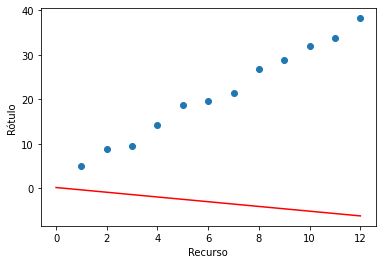

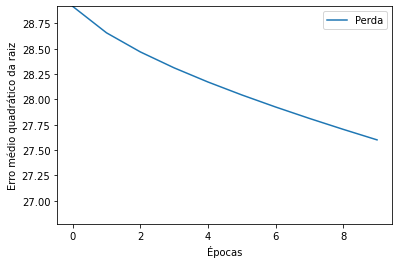

In [143]:
taxa_aprendizado = 0.01
epochs = 10
tam_lote=12

meu_modelo = criando_modelo(taxa_aprendizado)
peso_treinado, vies_treinado, epochs, rmse = treinando_modelo(meu_modelo,
                                                              meus_recursos,
                                                              meus_rotulos,
                                                              epochs,
                                                              tam_lote)

plotagem_do_modelo(peso_treinado, vies_treinado, meus_recursos, meus_rotulos)
plotagem_curva_perda(epochs, rmse)

## Exercício 1: Aumentar o número de épocas
A perda de treinamento deve diminuir constantemente, brutalmente no início e depois mais lentamente. Eventualmente, a perda de treinamento deve permanecer constante (inclinação zero ou inclinação quase zero), o que indica que o treinamento convergiu .

Sua tarefa é aumentar o número de épocas o suficiente para fazer o modelo convergir. No entanto, é ineficiente treinar a convergência passada, portanto, não basta definir o número de épocas para um valor arbitrariamente alto.

In [0]:
taxa_aprendizado=0.01
epochs=450
tam_lote=12

meu_modelo = criando_modelo(taxa_aprendizado)
peso_treinado, vies_treinado, epochs, rmse = treinando_modelo(meu_modelo,
                                                              meus_recursos,
                                                              meus_rotulos,
                                                              epochs,
                                                              tam_lote)

plotagem_do_modelo(peso_treinado, vies_treinado, meus_recursos, meus_rotulos)
plotagem_curva_perda(epochs, rmse)

## Exercício 2: Aumentar a Taxa de Aprendizado
No exercício 2, foi aumentado o número de épocas para obter a convergência do modelo. Às vezes, é possível fazer o modelo convergir mais rapidamente aumentando a taxa de aprendizado. No entanto, definir uma taxa de aprendizado muito alta geralmente impossibilita a convergência de um modelo. No exercício 2, intencionalmente definir uma taxa de aprendizado muito alta. Execute a seguinte célula de código e veja o que acontece.

In [0]:
taxa_aprendizado = 100
epochs = 500


meu_modelo = criando_modelo(taxa_aprendizado)
peso_treinado, vies_treinado, epochs, rmse = treinando_modelo(meu_modelo,
                                                              meus_recursos,
                                                              meus_rotulos,
                                                              epochs,
                                                              tam_lote)

plotagem_do_modelo(peso_treinado, vies_treinado, meus_recursos, meus_rotulos)
plotagem_curva_perda(epochs, rmse)

O modelo resultante é terrível; a linha vermelha não se alinha com os pontos azuis. Além disso, a curva de perda oscila como uma montanha-russa . Uma curva de perda oscilante sugere fortemente que a taxa de aprendizado é muito alta.


##Exercício 3: Encontre a combinação ideal de épocas e taxa de aprendizado
Atribua valores aos dois hiperparâmetros a seguir para fazer o treinamento convergir da maneira mais eficiente possível:
* taxa de Aprendizagem
* épocas

In [0]:
taxa_aprendizado=0.14
epochs=70
tam_lote=12

meu_modelo = criando_modelo(taxa_aprendizado)
peso_treinado, vies_treinado, epochs, rmse = treinando_modelo(meu_modelo,
                                                              meus_recursos,
                                                              meus_rotulos,
                                                              epochs,
                                                              tam_lote)

plotagem_do_modelo(peso_treinado, vies_treinado, meus_recursos, meus_rotulos)
plotagem_curva_perda(epochs, rmse)

##Exercício 4: Ajustar o tamanho do lote
O sistema recalcula o valor de perda do modelo e ajusta os pesos e a tendência do modelo após cada iteração . Cada iteração é o período em que o sistema processa um lote. Por exemplo, se o tamanho do lote for 6, o sistema recalcula o valor de perda do modelo e ajusta os pesos e desvios do modelo após o processamento de cada 6 exemplos.

Uma época abrange iterações suficientes para processar todos os exemplos no conjunto de dados. Por exemplo, se o tamanho do lote for 12, cada época terá uma iteração. No entanto, se o tamanho do lote for 6, cada época consumirá duas iterações.

É tentador simplesmente definir o tamanho do lote para o número de exemplos no conjunto de dados (12, neste caso). No entanto, o modelo pode realmente treinar mais rapidamente em lotes menores. Por outro lado, lotes muito pequenos podem não conter informações suficientes para ajudar o modelo a convergir.

Qual é o menor número inteiro para o qual você pode definir **tam_lote** e ainda assim o modelo converge em épocas?

In [0]:
taxa_aprendizado=0.05
epochs=125
tam_lote=1

meu_modelo = criando_modelo(taxa_aprendizado)
peso_treinado, vies_treinado, epochs, rmse = treinando_modelo(meu_modelo,
                                                              meus_recursos,
                                                              meus_rotulos,
                                                              epochs,
                                                              tam_lote)

plotagem_do_modelo(peso_treinado, vies_treinado, meus_recursos, meus_rotulos)
plotagem_curva_perda(epochs, rmse)

##Resumo sobre ajustes  dos hiperparâmetros
A maioria dos problemas de aprendizado de máquina exige muito ajuste de hiperparâmetro. Infelizmente, não podemos fornecer regras de ajuste concretas para todos os modelos. A redução da taxa de aprendizado pode ajudar um modelo a convergir com eficiência, mas fazer com que outro modelo converja muito lentamente. Você deve experimentar para encontrar o melhor conjunto de hiperparâmetros para o seu conjunto de dados. Dito isto, aqui estão algumas regras práticas:
* A perda de treinamento deve diminuir constantemente, abruptamente no início e depois mais lentamente até que a inclinação da curva atinja ou se aproxime de zero.

* Se a perda de treinamento não convergir, treine por mais épocas.


* Se a perda de treinamento diminuir muito lentamente, aumente a taxa de aprendizado. Observe que definir a perda de treinamento muito alta também pode impedir a convergência da perda de treinamento.

* Se a perda de treinamento variar muito (ou seja, a perda de treinamento aumentar rapidamente), diminua a taxa de aprendizado.

* Diminuir a taxa de aprendizado enquanto aumenta o número de épocas ou o tamanho do lote geralmente é uma boa combinação.

* Definir o tamanho do lote para um número muito pequeno também pode causar instabilidade. Primeiro, tente valores grandes de tamanho de lote. Em seguida, diminua o tamanho do lote até ver a degradação.

* Para conjuntos de dados do mundo real que consistem em um número muito grande de exemplos, o conjunto de dados inteiro pode não caber na memória. Nesses casos, você precisará reduzir o tamanho do lote para permitir que um lote caiba na memória.

